In [1]:
import MDAnalysis as mda
import prolif as plf
from MDAnalysis.topology.guessers import guess_atom_element, guess_types

u = mda.Universe('md_0_500.tpr', 'md_0_500.xtc')
u.atoms.wrap(compound='fragments')
ligand_selection = u.select_atoms("resname MOL")

# Initialize 'elements' attribute for ligand atoms
ligand_elements = guess_types(ligand_selection.names)
u.add_TopologyAttr('elements', [''] * len(u.atoms))  # Initialize with empty strings
u.atoms[ligand_selection.indices].elements = ligand_elements  # Assign ligand elements

protein_selection = u.select_atoms(
    "protein",
    ligand=ligand_selection,
)

# Initialize 'elements' attribute for protein atoms
protein_elements = guess_types(protein_selection.names)
u.atoms[protein_selection.indices].elements = protein_elements  # Assign protein elements

print(protein_selection)
print(protein_selection.names)
print(protein_elements)
print(protein_selection.elements)


<AtomGroup [<Atom 91: N of type N of resname PHE, resid 2 and segid seg_0_lrl>, <Atom 92: H1 of type H of resname PHE, resid 2 and segid seg_0_lrl>, <Atom 93: CA of type CX of resname PHE, resid 2 and segid seg_0_lrl>, ..., <Atom 4904: C of type C of resname LEU, resid 296 and segid seg_0_lrl>, <Atom 4905: O of type O2 of resname LEU, resid 296 and segid seg_0_lrl>, <Atom 4906: OXT of type O2 of resname LEU, resid 296 and segid seg_0_lrl>]>
['N' 'H1' 'CA' ... 'C' 'O' 'OXT']
['N' 'H' 'C' ... 'C' 'O' 'O']
['N' 'H' 'C' ... 'C' 'O' 'O']


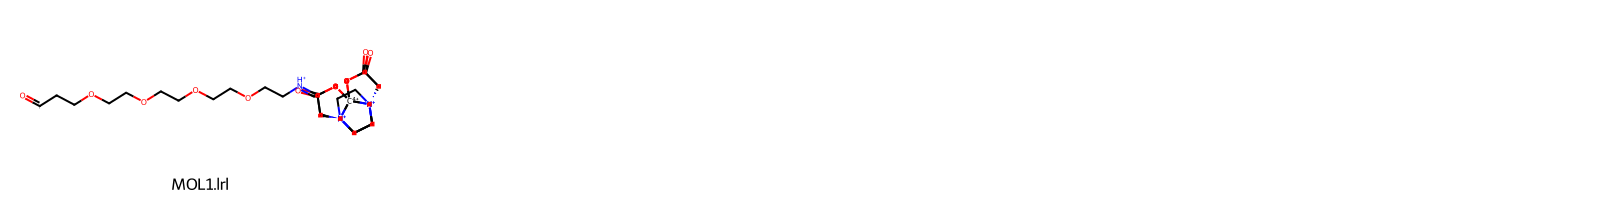

In [2]:
# create a molecule from the MDAnalysis selection
ligand_mol = plf.Molecule.from_mda(ligand_selection)
# display
plf.display_residues(ligand_mol, size=(400, 200))

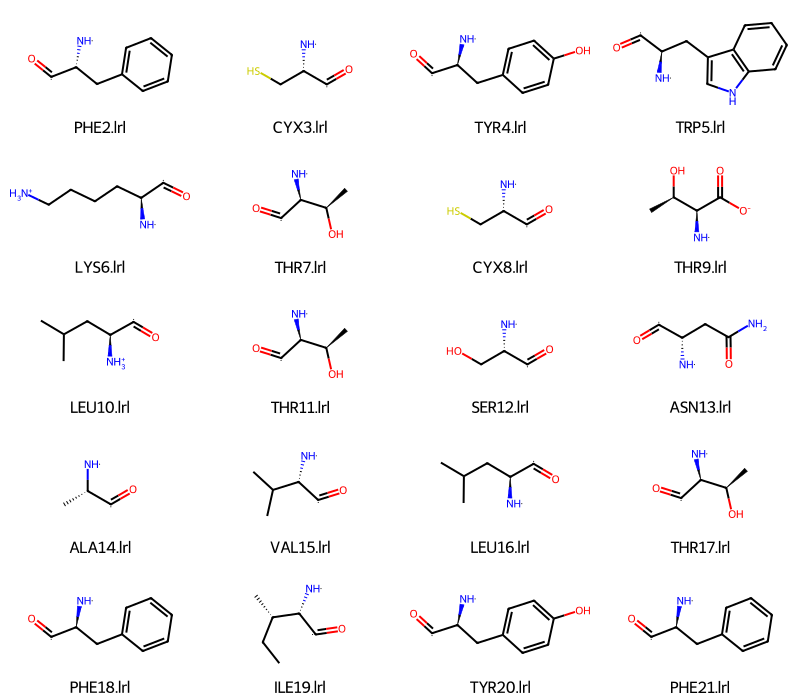

In [3]:
protein_mol = plf.Molecule.from_mda(protein_selection)
# remove the `slice(20)` part to show all residues
plf.display_residues(protein_mol, slice(20))

In [4]:
plf.Fingerprint.list_available()

['Anionic',
 'CationPi',
 'Cationic',
 'EdgeToFace',
 'FaceToFace',
 'HBAcceptor',
 'HBDonor',
 'Hydrophobic',
 'MetalAcceptor',
 'MetalDonor',
 'PiCation',
 'PiStacking',
 'VdWContact',
 'XBAcceptor',
 'XBDonor']

In [5]:
# use default interactions
fp = plf.Fingerprint()
# run on a slice of the trajectory frames: from begining to end with a step of 10
fp.run(u.trajectory[::500], ligand_selection, protein_selection)

  0%|          | 0/11 [00:00<?, ?it/s]

<prolif.fingerprint.Fingerprint: 9 interactions: ['Hydrophobic', 'HBAcceptor', 'HBDonor', 'Cationic', 'Anionic', 'CationPi', 'PiCation', 'PiStacking', 'VdWContact'] at 0x22723e7b6d0>

<Axes: xlabel='Frame'>

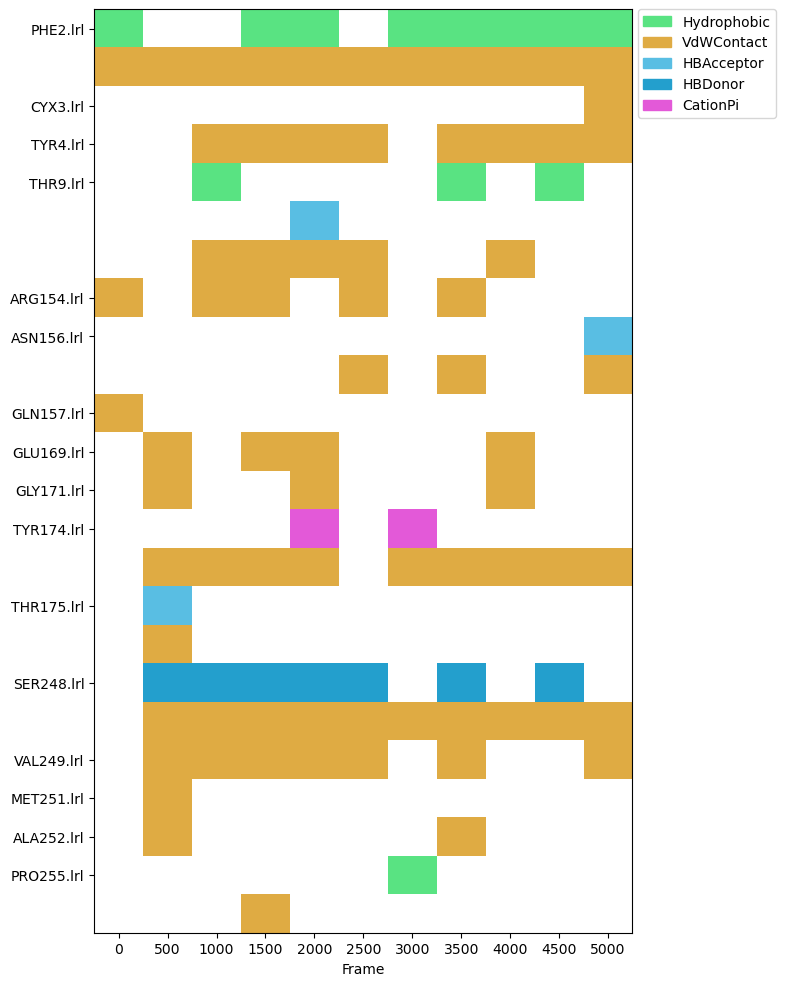

In [6]:
# %matplotlib ipympl

fp.plot_barcode()

In [7]:
fp_count = plf.Fingerprint(count=True)
fp_count.run(u.trajectory[0:-1], ligand_selection, protein_selection)


  0%|          | 0/5000 [00:00<?, ?it/s]

<prolif.fingerprint.Fingerprint: 9 interactions: ['Hydrophobic', 'HBAcceptor', 'HBDonor', 'Cationic', 'Anionic', 'CationPi', 'PiCation', 'PiStacking', 'VdWContact'] at 0x2272e617590>

In [8]:
frame = 4999
# seek specific frame
u.trajectory[frame]
ligand_mol = plf.Molecule.from_mda(ligand_selection)
protein_mol = plf.Molecule.from_mda(protein_selection)
# display
view = fp_count.plot_3d(ligand_mol, protein_mol, frame=frame, display_all=False)
view

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [9]:
fp_count.plot_lignetwork(ligand_mol, kind="frame", frame=4999, display_all=True)

<Axes: xlabel='Frame'>

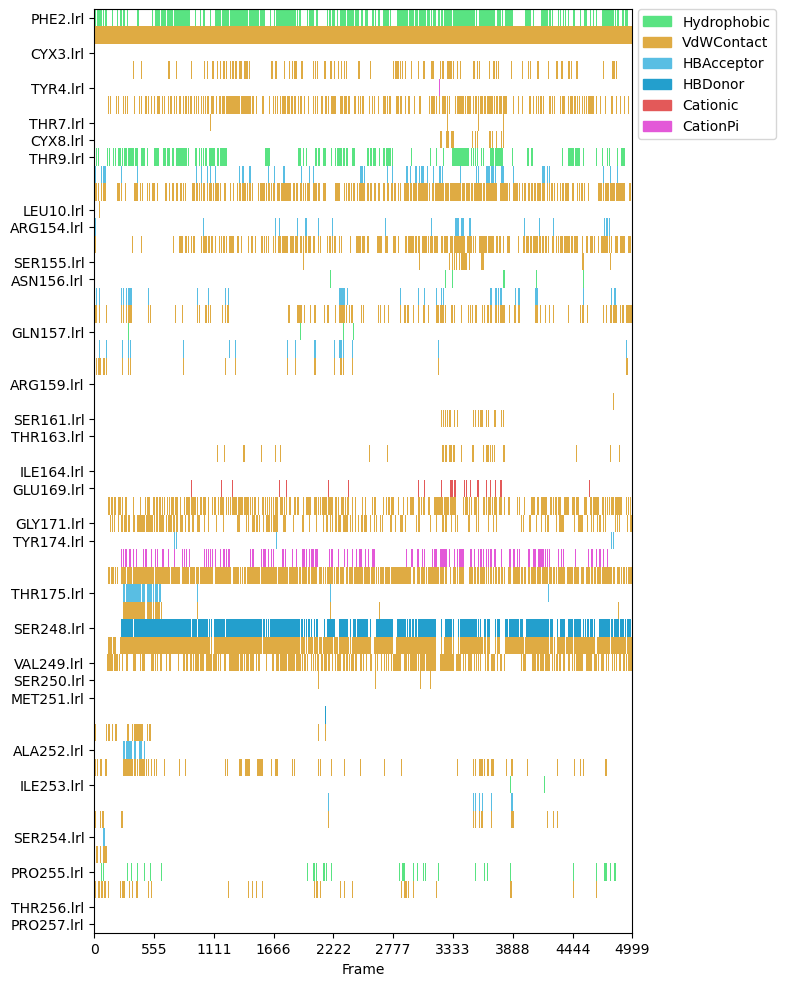

In [10]:
fp_count.plot_barcode()